https://zhuanlan.zhihu.com/p/34639593
链家网：链家是一家集房产交易服务、资产管理服务为一体以数据驱动的价值链房产服务平台，其业务覆盖二手房交易、新房交易、租赁、装修服务等。链家目前已覆盖北京、上海、广州、深圳、天津、成都、青岛、重庆、大连、合肥等28个地区，全国门店数量约8000家，旗下经纪人超过13万名。

## 1.数据获取

用爬虫总共爬取了广州11个区，对每个区分别爬取二手房信息再汇总，总共18099行（2018/06/11）。
![广州二手房数据](images/lianjia.png)

### 数据说明

链家网采集字段详细说明：

+ **houseName(房源小区名字)**，
+ **roomType(房屋户型)**， 
+ **area(房屋面积)**， 
+ **toward(房屋朝向)**， 
+ **floor(房屋楼层)**， 
+ **year(房屋建造时间)**，
+ **address(房屋地址)**，
+ **price(房屋价格)**，
+ **unitPrice(房屋单价)**，
+ **region(房屋所属区域)**。

## 2.数据清洗

In [116]:
# 导入包
library(ggplot2)

# 导入数据
data <- read.csv('data/lianjia_gz_ershoufang_new.csv', header = T)
str(data)

'data.frame':	18099 obs. of  11 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ houseName: Factor w/ 3589 levels "105国道大石段 ",..: 2565 1784 584 2376 2500 1218 1234 3570 2847 2676 ...
 $ roomType : Factor w/ 42 levels "10室2厅","10室3厅",..: 13 13 13 9 9 13 13 9 9 8 ...
 $ area     : Factor w/ 5848 levels "0室0厅","10.97平米",..: 5624 224 1171 4188 3699 441 449 4145 3451 4441 ...
 $ toward   : Factor w/ 167 levels "103.63平米","103平米",..: 161 163 162 162 163 162 166 162 163 164 ...
 $ floor    : Factor w/ 159 levels "19层","1层","2层",..: 32 21 48 32 108 84 135 159 109 134 ...
 $ year     : Factor w/ 104 levels "","1970年建板楼",..: 49 58 79 67 46 55 88 44 46 49 ...
 $ address  : Factor w/ 148 levels "白云大道北","白云大道南",..: 117 111 148 138 117 49 49 114 98 114 ...
 $ price    : num  580 505 1150 400 339 625 670 510 145 515 ...
 $ unitPrice: Factor w/ 11083 levels "单价100000元/平米",..: 9717 8093 10914 8811 8459 9327 9850 10364 1298 10201 ...
 $ region   : Factor w/ 11 levels "白云","从化",..: 9 9 9 9 9 9 9 

In [117]:
# 删除第一列
data <- data[, -1]
head(data)

houseName,roomType,area,toward,floor,year,address,price,unitPrice,region
穗园小区,3室2厅,96.34平米,东南,低楼层(共30层),2000年建塔楼,天润路,580,单价60204元/平米,天河
骏景花园,3室2厅,104平米,南 北,低楼层(共20层),2003年建塔楼,棠下,505,单价48558元/平米,天河
方圆月岛,3室2厅,132.5平米,南,低楼层(共46层),2009年建塔楼,珠江新城中,1150,单价86793元/平米,天河
赛拉维,2室2厅,75.59平米,南,低楼层(共30层),2006年建塔楼,员村,400,单价52918元/平米,天河
水利电力学院,2室2厅,67平米,南 北,高楼层(共8层),1999年建塔楼,天润路,339,单价50598元/平米,天河
华景新城翠安侬苑,3室2厅,109.88平米,南,高楼层(共32层),2002年建塔楼,华景新城,625,单价56881元/平米,天河


In [118]:

data$area <- as.numeric(sub(pattern = "平米", replacement = "", data$area))
head(data)

Warning message in eval(expr, envir, enclos):
"强制改变过程中产生了NA"

houseName,roomType,area,toward,floor,year,address,price,unitPrice,region
穗园小区,3室2厅,96.34,东南,低楼层(共30层),2000年建塔楼,天润路,580,单价60204元/平米,天河
骏景花园,3室2厅,104.00,南 北,低楼层(共20层),2003年建塔楼,棠下,505,单价48558元/平米,天河
方圆月岛,3室2厅,132.50,南,低楼层(共46层),2009年建塔楼,珠江新城中,1150,单价86793元/平米,天河
赛拉维,2室2厅,75.59,南,低楼层(共30层),2006年建塔楼,员村,400,单价52918元/平米,天河
水利电力学院,2室2厅,67.00,南 北,高楼层(共8层),1999年建塔楼,天润路,339,单价50598元/平米,天河
华景新城翠安侬苑,3室2厅,109.88,南,高楼层(共32层),2002年建塔楼,华景新城,625,单价56881元/平米,天河


In [119]:
data <- na.omit(data)

In [120]:
# data$year <- factor(substr(data$year, 1, 4))
data$year <- ifelse(as.numeric(substring(data$year,1,4)) %in% 1950:2100, substring(data$year,1,4),'其他')
data$year <- factor(data$year)
# head(data)

Warning message in as.numeric(substring(data$year, 1, 4)) %in% 1950:2100:
"强制改变过程中产生了NA"

In [121]:
data$unitPrice <- as.numeric(sub(pattern = "单价(.*)元/平米", replacement = "\\1", data$unitPrice))
head(data)

houseName,roomType,area,toward,floor,year,address,price,unitPrice,region
穗园小区,3室2厅,96.34,东南,低楼层(共30层),2000,天润路,580,60204,天河
骏景花园,3室2厅,104.00,南 北,低楼层(共20层),2003,棠下,505,48558,天河
方圆月岛,3室2厅,132.50,南,低楼层(共46层),2009,珠江新城中,1150,86793,天河
赛拉维,2室2厅,75.59,南,低楼层(共30层),2006,员村,400,52918,天河
水利电力学院,2室2厅,67.00,南 北,高楼层(共8层),1999,天润路,339,50598,天河
华景新城翠安侬苑,3室2厅,109.88,南,高楼层(共32层),2002,华景新城,625,56881,天河


In [122]:
library(stringr)

data$floor <- ifelse(substring(data$floor,1,3) %in% c('低楼层','中楼层','高楼层'), substring(data$floor,1,3),'其他')
data$floor <- factor(data$floor)

In [123]:
head(data)

houseName,roomType,area,toward,floor,year,address,price,unitPrice,region
穗园小区,3室2厅,96.34,东南,低楼层,2000,天润路,580,60204,天河
骏景花园,3室2厅,104.00,南 北,低楼层,2003,棠下,505,48558,天河
方圆月岛,3室2厅,132.50,南,低楼层,2009,珠江新城中,1150,86793,天河
赛拉维,2室2厅,75.59,南,低楼层,2006,员村,400,52918,天河
水利电力学院,2室2厅,67.00,南 北,高楼层,1999,天润路,339,50598,天河
华景新城翠安侬苑,3室2厅,109.88,南,高楼层,2002,华景新城,625,56881,天河


## 3.数据探索

In [124]:
amount <- data.frame(table(data$region))

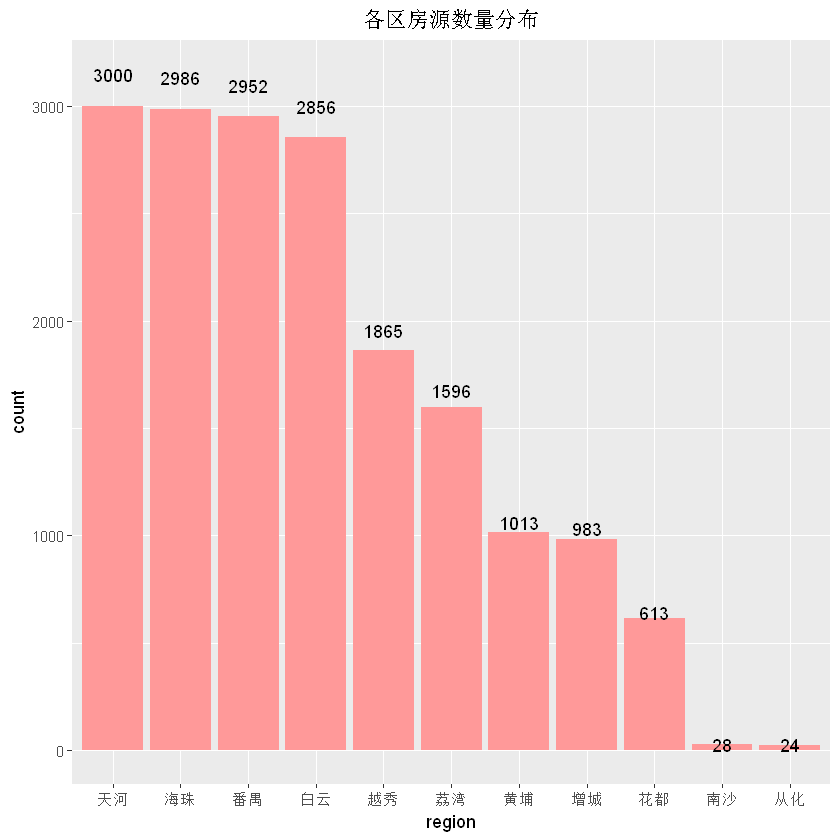

In [125]:
ggplot(data = amount, mapping = aes(x = reorder(Var1, -Freq),y = Freq))+
    # 生成标题
    ggtitle('各区房源数量分布') +
    # 生成条形图，每个柱的宽度0.8，填充'#FF9999'的颜色
    geom_bar(stat = 'identity', fill = '#FF9999') + 
    # 标题居中
    theme(plot.title = element_text(hjust = 0.5)) + 
    # 在条形图上标注数字
    geom_text(aes(label = Freq),position = position_stack(vjust = 1.05)) +
    # 横轴标签'各区'
    xlab('region') + 
    # 纵轴标签'数量'
    ylab('count')

In [126]:
typetop15 = sort(summary(data$roomType),decreasing = T)
typetop15[1:10]

3室2厅 2室1厅 2室2厅 3室1厅 4室2厅 1室1厅 1室0厅 5室2厅 4室1厅 1室2厅 
  5718   3468   3261   1684   1380   1210    449    299    119     69

In [127]:
data[which(data$roomType=="3室2厅"),] 

,houseName,roomType,area,toward,floor,year,address,price,unitPrice,region
1,穗园小区,3室2厅,96.34,东南,低楼层,2000,天润路,580,60204,天河
2,骏景花园,3室2厅,104.00,南 北,低楼层,2003,棠下,505,48558,天河
3,方圆月岛,3室2厅,132.50,南,低楼层,2009,珠江新城中,1150,86793,天河
6,华景新城翠安侬苑,3室2厅,109.88,南,高楼层,2002,华景新城,625,56881,天河
7,华景新城信华花园,3室2厅,109.00,西南,中楼层,2012,华景新城,670,61468,天河
14,华景新城信华花园,3室2厅,104.00,西南,中楼层,2012,华景新城,620,59616,天河
16,金燕花园,3室2厅,103.00,东,低楼层,2004,粤垦,415,40292,天河
17,侨林苑三期,3室2厅,106.12,东南,中楼层,2003,天河北,900,84810,天河
18,穗园小区,3室2厅,103.00,南 北,低楼层,2000,天润路,550,53399,天河
24,天河东远洋宿舍天河东路,3室2厅,106.00,北,高楼层,1990,体育中心,689,65000,天河


Warning message:
"position_dodge requires non-overlapping x intervals"

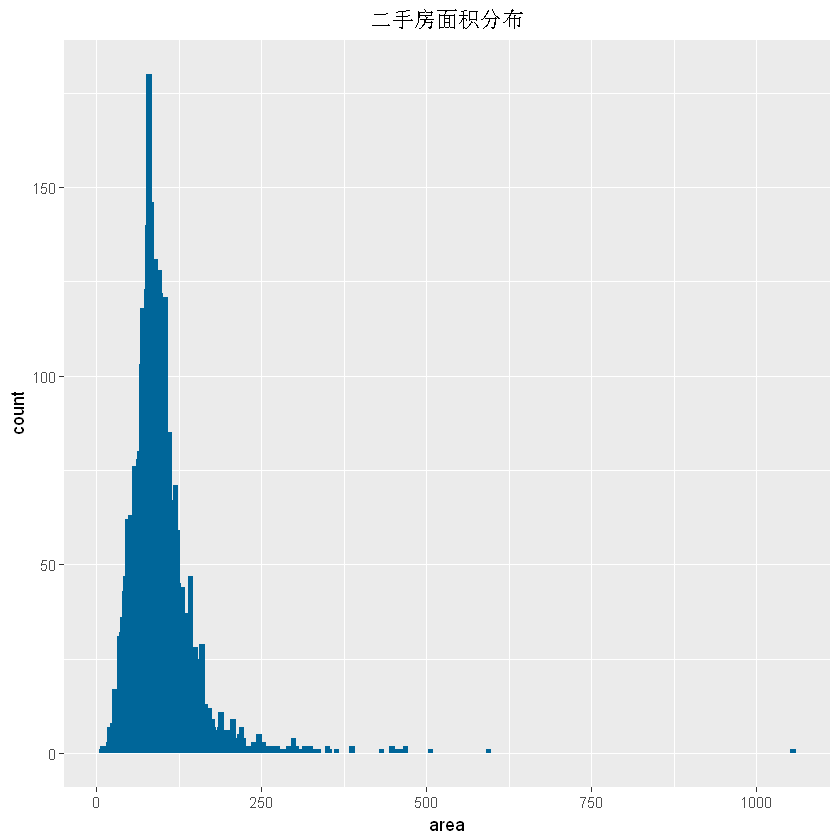

In [128]:
ggplot(data,aes(area))+
  geom_bar(stat = 'count',position = 'dodge', width = 8, fill = '#006699')+
  ggtitle('二手房面积分布')+
  theme(plot.title = element_text(hjust = 0.5),legend.position = "bottom")

In [129]:
summary(data$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.76   69.44   86.48   92.06  106.00 1055.98 

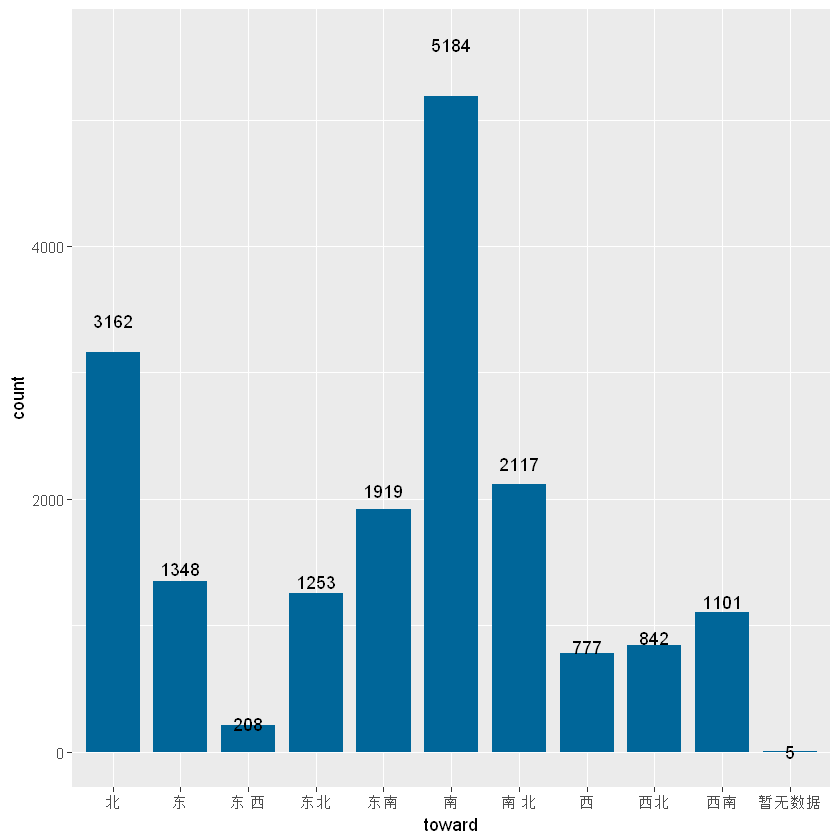

In [130]:
ggplot(data,aes(toward))+
  geom_bar(stat = 'count',position = 'dodge', width = 0.8, fill = '#006699')+
  geom_text(stat = "count",aes(label = ..count..),position = position_stack(vjust = 1.08))

In [131]:
addresstop15 = sort(summary(data$address), decreasing = T)[1:15]
addresstop15

(Other)       市桥       区府       金碧     金沙洲       华南     凤凰城 
       852        805        706        590        540        535        504 
      新塘 白云大道北       沙湾     新港西       同和       东圃   天河公园 
       470        397        389        345        323        308        308 
      南浦 
       298

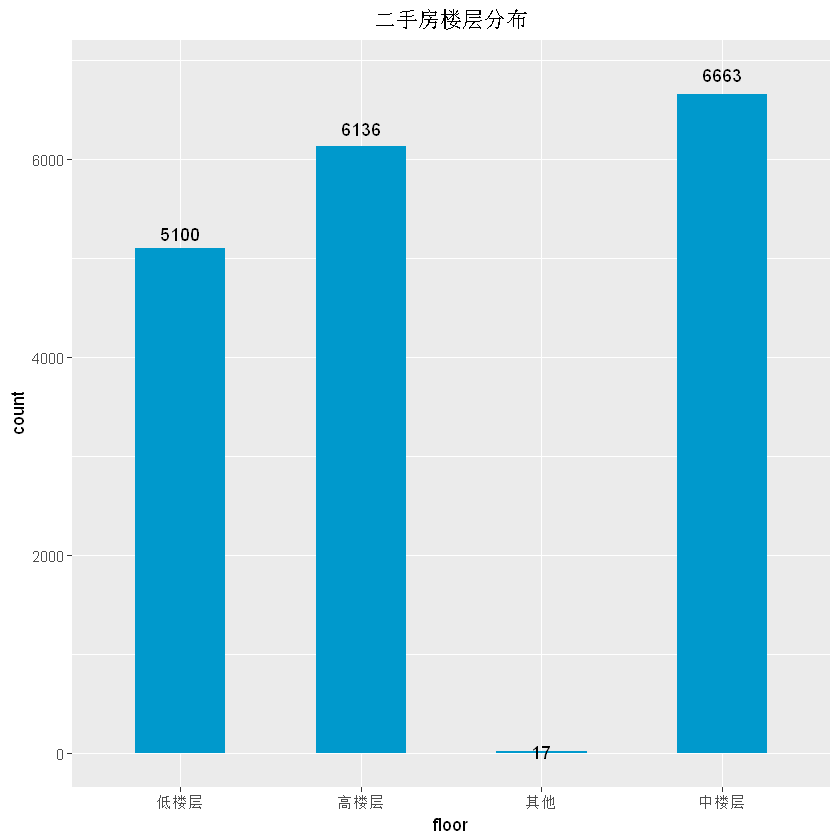

In [132]:
ggplot(data, aes(floor))+
  geom_bar(stat = 'count',position = 'dodge', width = 0.5, fill = '#0099cc')+
  geom_text(stat = "count",aes(label = ..count..),position = position_stack(vjust = 1.03))+
  ggtitle('二手房楼层分布')+
  theme(plot.title = element_text(hjust = 0.5),legend.position = "bottom")

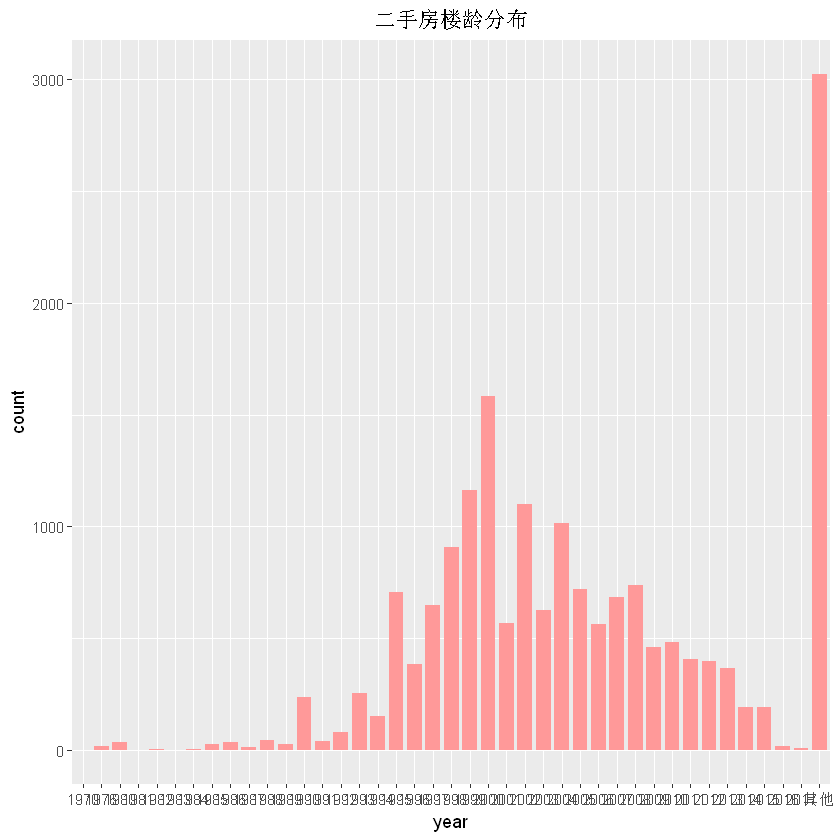

In [133]:
ggplot(data, aes(year))+
  geom_bar(stat = 'count', position = 'dodge', width = 0.8, fill = '#FF9999')+
  ggtitle('二手房楼龄分布')+
  theme(plot.title = element_text(hjust = 0.5),legend.position = "bottom")

Warning message:
"position_dodge requires non-overlapping x intervals"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   30.0   225.0   310.0   370.1   450.0  5388.0 

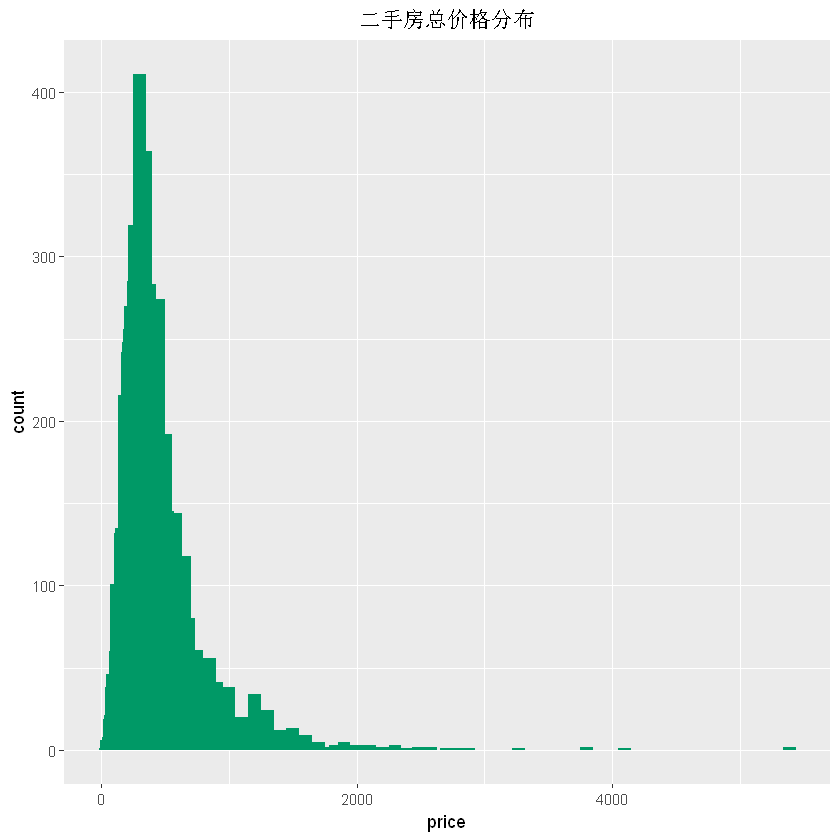

In [134]:
ggplot(data, aes(price))+
  geom_bar(stat = 'count', position = 'dodge', width = 100, fill = '#009966')+
  ggtitle('二手房总价格分布')+
  theme(plot.title = element_text(hjust = 0.5),legend.position = "bottom")
summary(data$price)

Warning message:
"position_dodge requires non-overlapping x intervals"

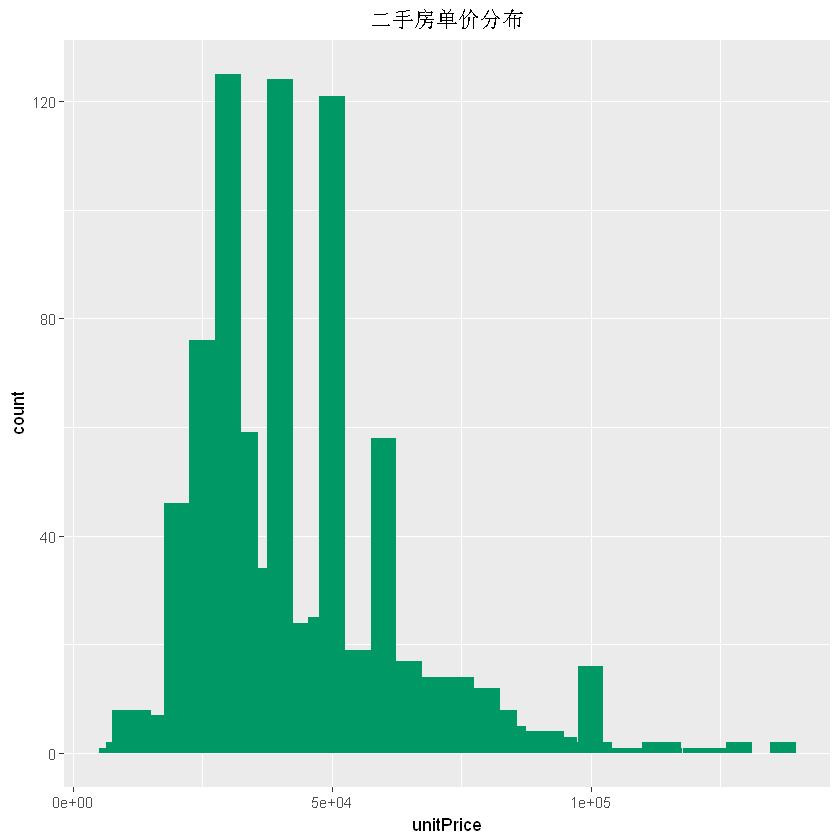

In [135]:
ggplot(data, aes(unitPrice))+
  geom_bar(stat = 'count', position = 'dodge', width = 5000, fill = '#009966')+
  ggtitle('二手房单价分布')+
  theme(plot.title = element_text(hjust = 0.5))

Group.1,x
白云,35170.78
从化,15607.04
番禺,29804.98
海珠,45234.31
花都,18668.73
黄埔,33193.50
荔湾,37338.47
南沙,19044.43
天河,54132.78
越秀,53918.58


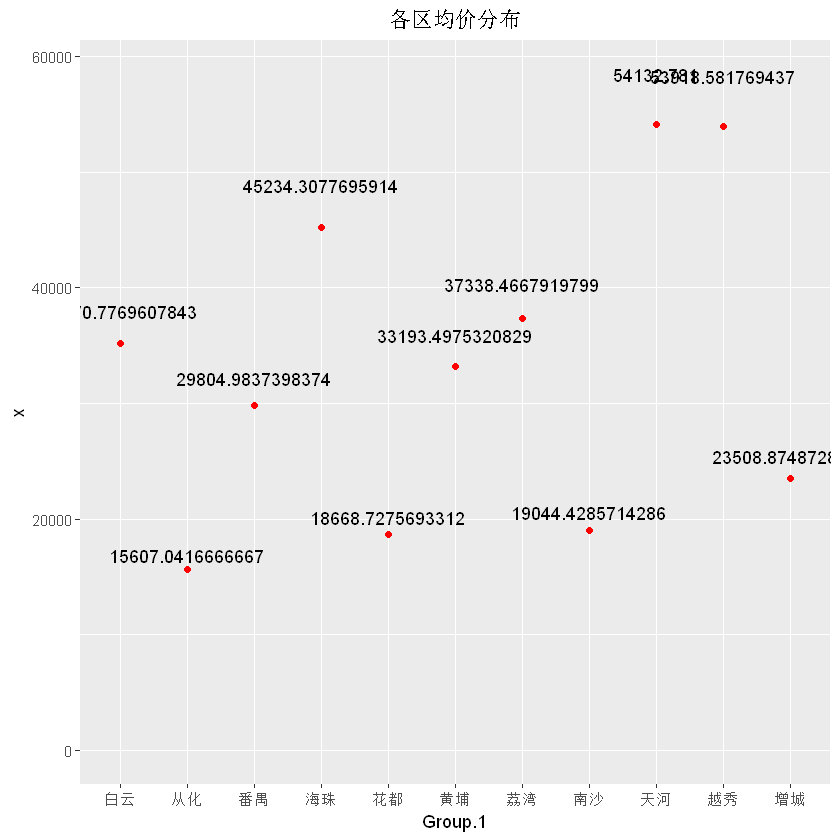

In [136]:
all = aggregate(data$unitPrice,by=list(data$region),mean)
all
ggplot(all, aes(Group.1,x))+
  geom_point(colour = I("red"))+
  ggtitle('各区均价分布')+
  geom_text(aes(label = x),position = position_stack(vjust = 1.08))+
  theme(plot.title = element_text(hjust = 0.5))

Warning message:
"Removed 38 rows containing non-finite values (stat_boxplot)."

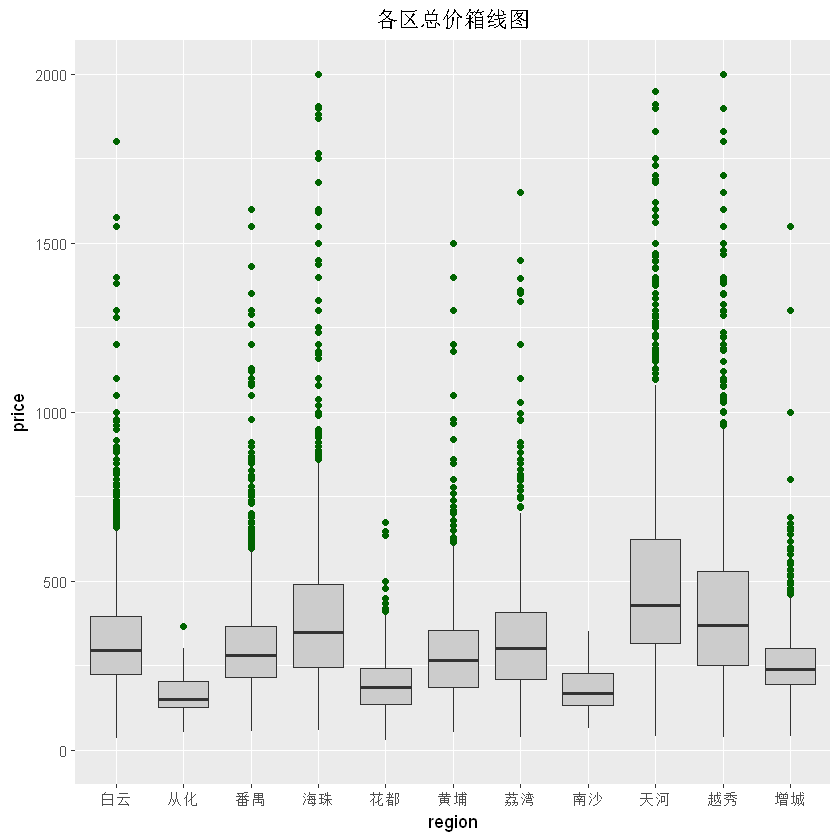

In [137]:
ggplot(data,aes(region,price))+
  geom_boxplot(outlier.colour="darkgreen",fill="grey80")+ylim(0,2000)+
  ggtitle('各区总价箱线图')+
  theme(plot.title = element_text(hjust = 0.5),legend.position = "bottom")

Warning message:
"Removed 45 rows containing non-finite values (stat_boxplot)."

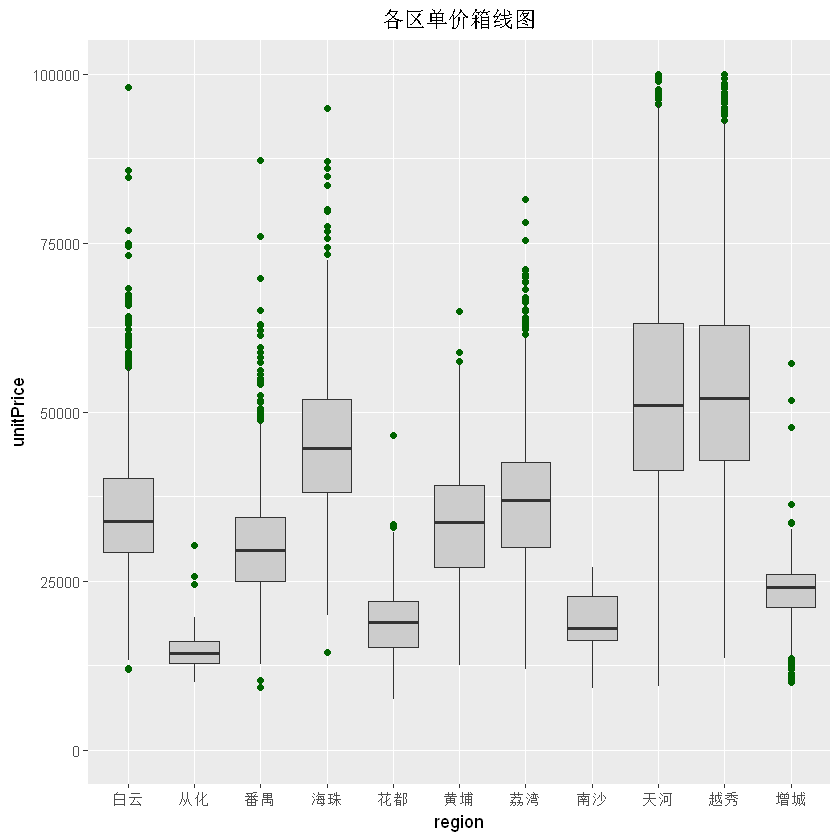

In [138]:
ggplot(data,aes(region,unitPrice))+
  geom_boxplot(outlier.colour="darkgreen",fill="grey80")+ylim(0,100000)+
  ggtitle('各区单价箱线图')+
  theme(plot.title = element_text(hjust = 0.5),legend.position = "bottom")

In [139]:
set.seed(1234)
standard = data.frame(scale(data[,c('area','price','unitPrice')]))
clust = kmeans(x=standard, centers = 5, iter.max = 100)
table(clust$cluster)


   1    2    3    4    5 
2174 2616  369 7120 5637 

In [140]:
table(data$region,clust$cluster)

      
          1    2    3    4    5
  白云   89  494   29 1528  716
  从化    0    5    0   19    0
  番禺   13  870   35 1776  258
  海珠  506  199   54  682 1545
  花都    0  157    0  455    1
  黄埔   14  138   13  562  286
  荔湾   80  230   21  726  539
  南沙    0    6    0   22    0
  天河  972  166  161  370 1331
  越秀  500   69   51  285  960
  增城    0  282    5  695    1

In [141]:
aggregate(data$area,list(data$roomType),mean)

Group.1,x
10室2厅,101.68000
10室3厅,456.00000
12室3厅,140.45500
1室0厅,38.51399
1室1厅,46.54197
1室2厅,61.01029
2室0厅,49.73417
2室1厅,67.89321
2室2厅,78.68835
2室3厅,92.79000


In [142]:
aggregate(data[,c(3,8,9)],list(clust$cluster),mean)

Group.1,area,price,unitPrice
1,105.30535,670.6460,65055.70
2,140.69191,452.6952,32697.15
3,222.88686,1439.7851,68255.00
4,76.95374,212.4081,27972.92
5,74.88711,344.9284,46800.82


In [143]:
tot.wssplot <- function(data, nc, seed=1234){
  #假设分为一组时的总的离差平方和              
  tot.wss <- (nrow(data)-1)*sum(apply(data,2,var)) 
  for (i in 2:nc){
    #必须指定随机种子数
    set.seed(seed) 
    tot.wss[i] <- kmeans(data, centers=i, iter.max = 100)$tot.withinss
  }
  plot(1:nc, tot.wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares",col = 'blue',
       lwd = 2, main = 'Choose best Clusters')
}

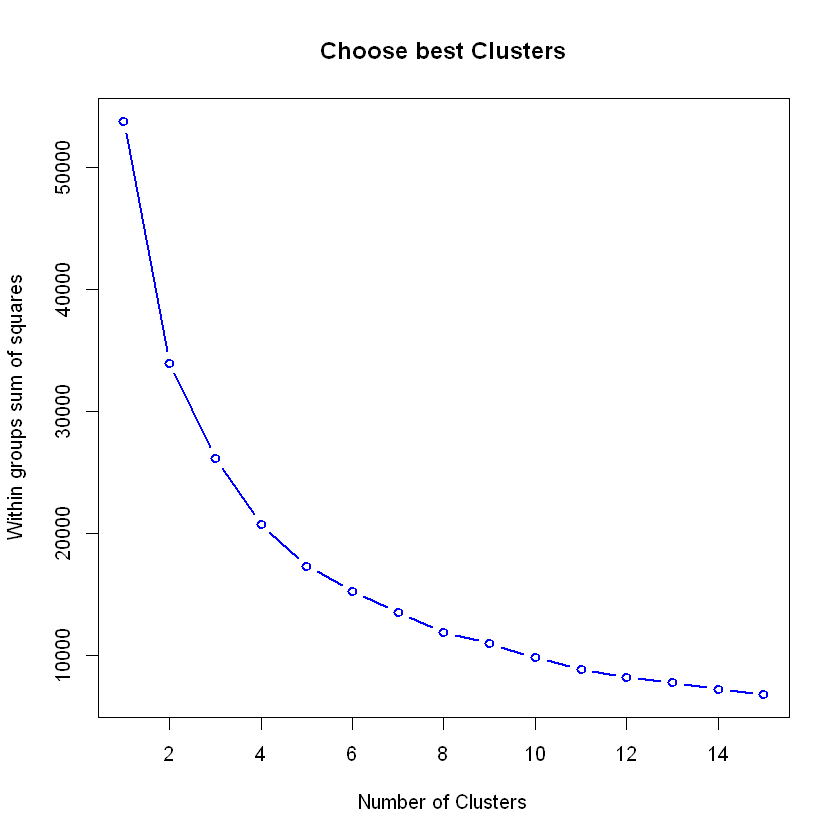

In [144]:
standard = data.frame(scale(data[,c('area','price','unitPrice')]))
myplot <- tot.wssplot(standard, nc = 15)

In [145]:
haizhu = data[6510:9509,]
liwan = data[4890:6509,]
yuexiu = data[3000:4889,]

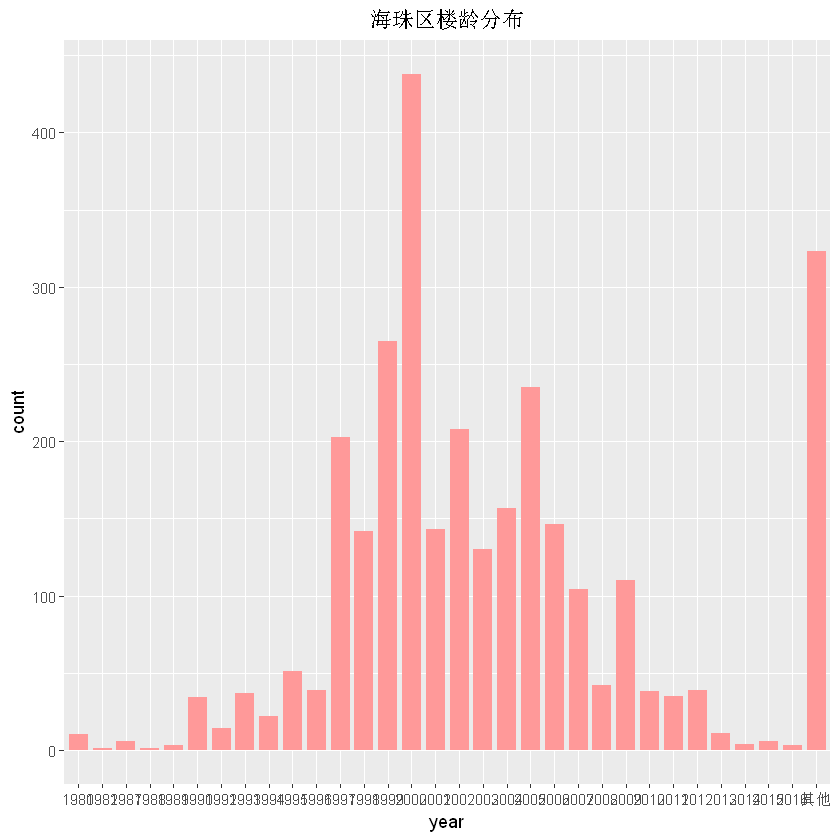

In [146]:
ggplot(haizhu, aes(year))+
  geom_bar(stat = 'count', position = 'dodge', width = 0.8, fill = '#FF9999')+
  ggtitle('海珠区楼龄分布')+
  theme(plot.title = element_text(hjust = 0.5))

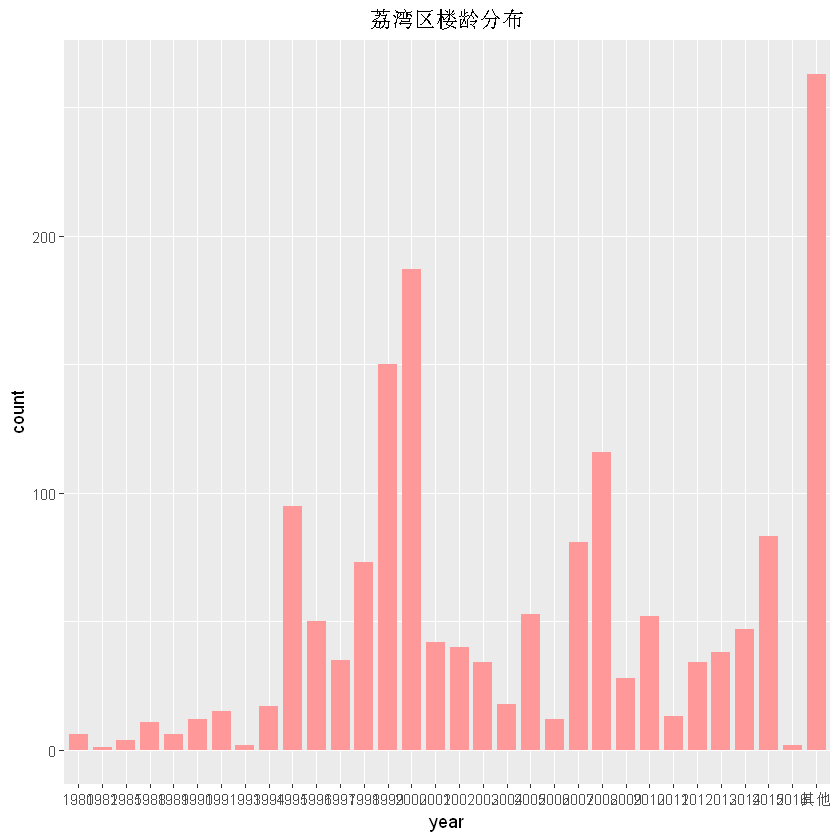

In [147]:
ggplot(liwan, aes(year))+
  geom_bar(stat = 'count', position = 'dodge', width = 0.8, fill = '#FF9999')+
  ggtitle('荔湾区楼龄分布')+
  theme(plot.title = element_text(hjust = 0.5))


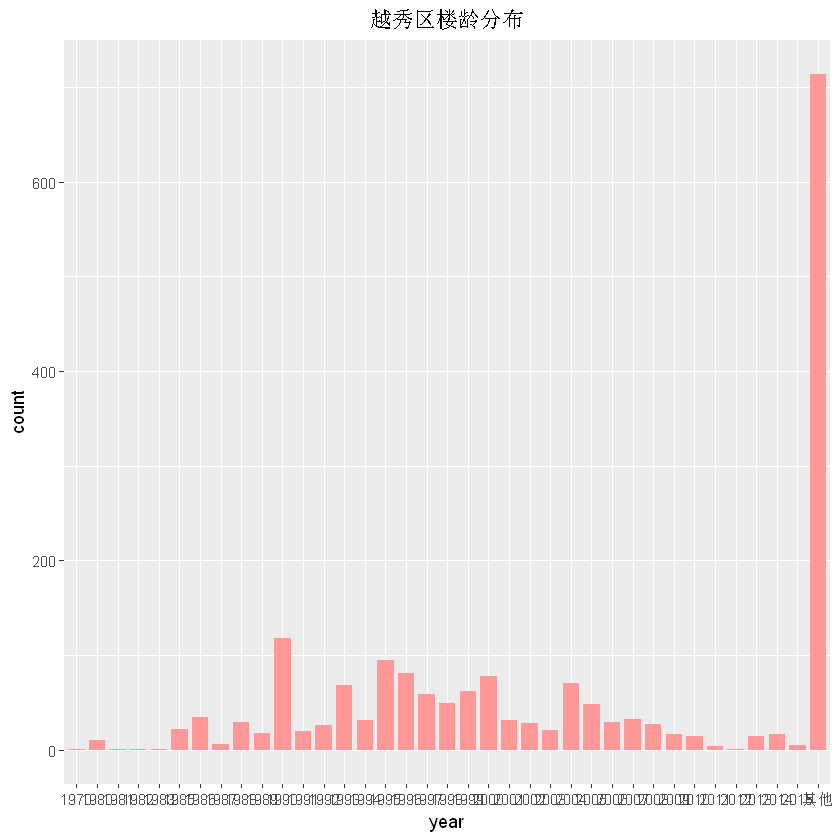

In [148]:
ggplot(yuexiu, aes(year))+
  geom_bar(stat = 'count', position = 'dodge', width = 0.8, fill = '#FF9999')+
  ggtitle('越秀区楼龄分布')+
  theme(plot.title = element_text(hjust = 0.5))


In [149]:
table(data$year)


1970 1976 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 
   1   16   35    1    3    1    2   26   36   12   43   28  238   38   82  253 
1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 
 151  707  385  647  908 1161 1581  566 1102  625 1015  718  564  686  739  459 
2010 2011 2012 2013 2014 2015 2016 2017 其他 
 482  408  396  368  190  192   19    7 3025 

In [151]:
sort(table(data$region))


从化 南沙 花都 增城 黄埔 荔湾 越秀 白云 番禺 海珠 天河 
  24   28  613  983 1013 1596 1865 2856 2952 2986 3000 